# Step 1: Train the Distribution Classifier

In [8]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt

## 1.0 Hyperparameters and Paths

In [9]:
INPUT_DIM =31
HIDDEN_DIM = [64, 32, 16]
LABEL_NUM = 5
BATCH_SIZE_1 = 32
EPOCH_1 = 20
LEARNING_RATE_1 = 0.001
TRAIN_PATH_1 = "data/distribution/distribution_train.csv"
TEST_PATH_1 = "data/distribution/distribution_test.csv"
SAVE_MODEL_PATH_1 = "model/best_classifier.pth"

## 1.1 Load Data

In [10]:
# Data Loading
def load_data(path):
    data = pd.read_csv(path)
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values
    return torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

# Load Data
train_path_1 = TRAIN_PATH_1
test_path_1 = TEST_PATH_1
train_features_1, train_labels_1 = load_data(train_path_1)
test_features_1, test_labels_1 = load_data(test_path_1)

# DataLoader
train_loader = DataLoader(TensorDataset(train_features_1, train_labels_1), batch_size=BATCH_SIZE_1, shuffle=True)
test_loader = DataLoader(TensorDataset(test_features_1, test_labels_1), batch_size=BATCH_SIZE_1, shuffle=False)

## 1.2 Define Classifier

In [11]:
# Define the Class
class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super().__init__()
        layers = []
        for i in range(len(hidden_dims)):
            if i == 0:
                layers.append(nn.Linear(input_dim, hidden_dims[i]))
            else:
                layers.append(nn.Linear(hidden_dims[i-1], hidden_dims[i]))
            layers.append(nn.ReLU())
        
        # Add the final layer
        layers.append(nn.Linear(hidden_dims[-1], output_dim))
        
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

## 1.3 Define Train and Evaluation Function

In [12]:
def train_and_evaluate(train_loader, valid_loader, model, criterion, optimizer, epochs=EPOCH_1):
    best_model = None
    best_accuracy = 0
    train_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in valid_loader:
                outputs = model(features)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        valid_accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model.state_dict()

        print(f'Epoch {epoch+1}: Train Loss: {train_loss / len(train_loader):.4f}, Valid Accuracy: {accuracy:.4f}')

    return best_model, train_losses, valid_accuracies

## 1.4 Train and Save Best Model

In [13]:
# Model initialization
model = MLPClassifier(INPUT_DIM, HIDDEN_DIM, LABEL_NUM)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE_1)

# Train and Evaluation
best_model, train_losses, test_accuracies = train_and_evaluate(train_loader, test_loader, model, criterion, optimizer)

# Save the best model
save_path = SAVE_MODEL_PATH_1
torch.save(best_model, save_path)
print(f"The model has been saved to {save_path}")

Epoch 1: Train Loss: 1.4978, Valid Accuracy: 0.5467
Epoch 2: Train Loss: 0.8812, Valid Accuracy: 0.5933
Epoch 3: Train Loss: 0.6048, Valid Accuracy: 0.8600
Epoch 4: Train Loss: 0.4088, Valid Accuracy: 1.0000
Epoch 5: Train Loss: 0.2197, Valid Accuracy: 1.0000
Epoch 6: Train Loss: 0.0782, Valid Accuracy: 1.0000
Epoch 7: Train Loss: 0.0228, Valid Accuracy: 1.0000
Epoch 8: Train Loss: 0.0121, Valid Accuracy: 1.0000
Epoch 9: Train Loss: 0.0082, Valid Accuracy: 1.0000
Epoch 10: Train Loss: 0.0060, Valid Accuracy: 1.0000
Epoch 11: Train Loss: 0.0049, Valid Accuracy: 1.0000
Epoch 12: Train Loss: 0.0042, Valid Accuracy: 1.0000
Epoch 13: Train Loss: 0.0036, Valid Accuracy: 1.0000
Epoch 14: Train Loss: 0.0032, Valid Accuracy: 1.0000
Epoch 15: Train Loss: 0.0029, Valid Accuracy: 1.0000
Epoch 16: Train Loss: 0.0025, Valid Accuracy: 1.0000
Epoch 17: Train Loss: 0.0023, Valid Accuracy: 1.0000
Epoch 18: Train Loss: 0.0019, Valid Accuracy: 1.0000
Epoch 19: Train Loss: 0.0017, Valid Accuracy: 1.0000
Ep

## 1.5 Training Process Visualization

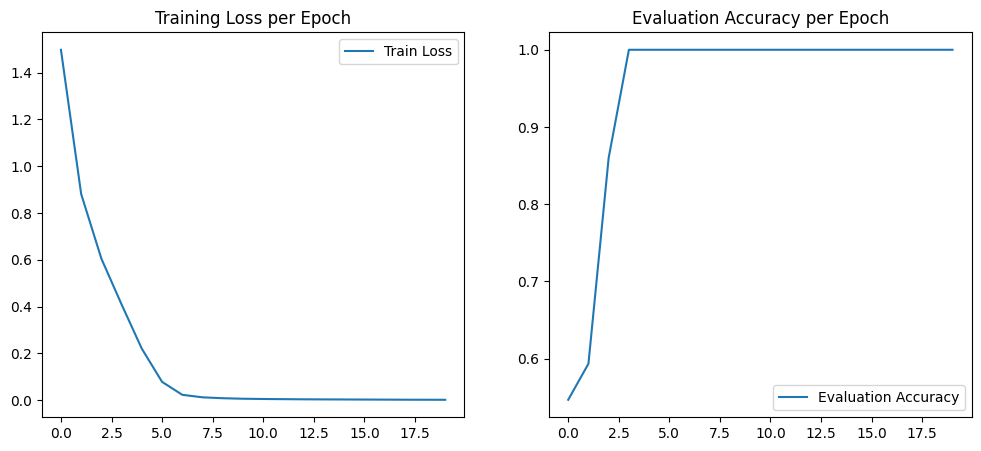

In [14]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Evaluation Accuracy')
plt.title('Evaluation Accuracy per Epoch')
plt.legend()
plt.show()